In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * 
from tensorflow.keras.preprocessing.sequence import * 

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 

train_dir = r'C:\Users\44788\Desktop\CatsvsDogs\train'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255) 
validation_dir = r'C:\Users\44788\Desktop\CatsvsDogs\validation'
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 23998 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


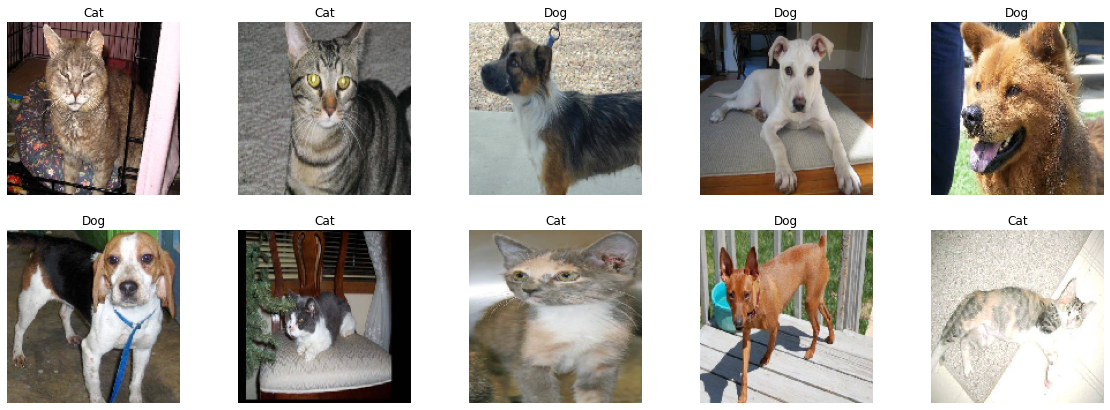

In [3]:
d_or_c = ['Cat', 'Dog']
images = validation_generator[1]
im = images[1]
fig, ax = plt.subplots(2,5, figsize=(20,7))
for i in range(10):
    if i < 5:
        im = images[0]
        ax[0,i].imshow(im[i])
        animal_class = validation_generator[1][1][i]
        ax[0,i].set_title(str(d_or_c[int(animal_class)]))
        ax[0,i].axis('off')
    else:
        im = images[0]
        ax[1,5-i].imshow(im[i])
        animal_class = validation_generator[1][1][i]
        ax[1,5-i].set_title(str(d_or_c[int(animal_class)]))
        ax[1,5-i].axis('off')

In [4]:
def get_benchmark_model(input_shape):
    inputs = Input(shape=(input_shape))
    x = Conv2D(32, (3,3), activation='relu', padding='SAME')(inputs)
    x = Conv2D(32, (3,3), activation='relu', padding='SAME')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(64, (3,3), activation='relu', padding='SAME')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='SAME')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(128, (3,3), activation='relu', padding='SAME')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='SAME')(x)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='sigmoid')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=RMSprop(lr=0.0001),
                      loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return model 

In [7]:
benchmark_model = get_benchmark_model(validation_generator[1][0].shape[1:])

benchmark_history = benchmark_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=50,
                    epochs=100,
                    validation_steps=50,
                    verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

<AxesSubplot:>

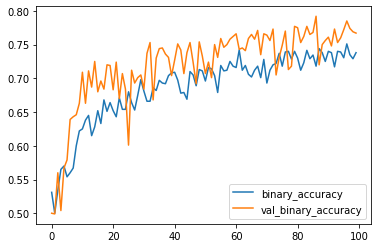

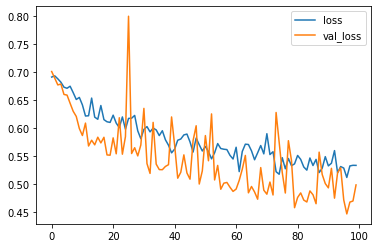

In [12]:
df = pd.DataFrame(benchmark_history.history)
df.plot(y=['binary_accuracy', 'val_binary_accuracy'])
df.plot(y=['loss', 'val_loss'])

In [9]:
transfer_model = tf.keras.applications.MobileNetV2()

In [16]:
def remove_head(pretrained_model):
    chosen_output = pretrained_model.get_layer('global_average_pooling2d_1').output
    model = Model(inputs=pretrained_model.inputs, outputs=chosen_output)
    return model

In [29]:
feature_extractor = remove_head(transfer_model)

In [18]:
def add_new_classifier_head(feature_extractor_model):
    model = Sequential([
        feature_extractor_model,
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model 

In [25]:
new_model = add_new_classifier_head(feature_extractor)

In [26]:
def freeze_pretrained_weights(model):
    model.get_layer('model_3').trainable = False
    model.compile(optimizer=RMSprop(lr=0.001),
                      loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return model 

In [27]:
frozen_new_model = freeze_pretrained_weights(new_model)
frozen_new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Functional)         (None, 1280)              2257984   
_________________________________________________________________
dense_7 (Dense)              (None, 32)                40992     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 2,299,009
Trainable params: 41,025
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 

train_dir = r'C:\Users\44788\Desktop\CatsvsDogs\train'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(224,224),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255) 
validation_dir = r'C:\Users\44788\Desktop\CatsvsDogs\validation'
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 23998 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


In [ ]:
frozen_history = frozen_new_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=50,
                    epochs=100,
                    validation_steps=50,
                    verbose=1)

In [35]:
frozen_new_model.evaluate(validation_generator)

51/51 [==============================] - 7s 133ms/step - loss: 0.0637 - binary_accuracy: 0.9800


[0.06371750682592392, 0.9800398945808411]